#### [Chapter 20](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_19.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_20.ipynb) -->

**Chemical synapses**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package in colab
# !pip install "git+https://github.com/Ziaeemehr/mndynamics.git"

In [1]:
from mndynamics.models.py.RTM_Base import RTM_ins
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = [7, 5]

In [3]:
obj = RTM_ins()
obj()

Reduced Traub-Miles Model of a Pyramidal Neuron 
in Rat Hippocampus with nearly instantaneous rise synapse.


{'c': 1.0,
 'g_k': 80.0,
 'g_na': 100.0,
 'g_l': 0.1,
 'v_k': -100.0,
 'v_na': 50.0,
 'v_l': -67.0,
 'v_thr': -20.0,
 'i_ext': 1.5,
 't_end': 100.0,
 'v0': -70.0,
 'dt': 0.01,
 'tau_r': 0.2,
 'tau_d': 2.0}

In [4]:
obj = RTM_ins({'tau_r': 0.2})
data = obj.simulate()
t = data['t']
v = data['v']
s1 = data['s']

obj = RTM_ins({'tau_r': 1.0})
data = obj.simulate()
t = data['t']
v = data['v']
s2 = data['s']

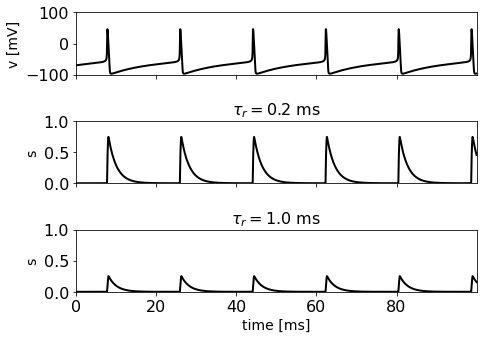

In [5]:
fig, ax = plt.subplots(3, figsize=(7, 5), sharex=True)

ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s1, lw=2, c="k")
ax[2].plot(t, s2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[1].set_title(r"$\tau_r = 0.2$ ms")
ax[2].set_title(r"$\tau_r = 1.0$ ms")
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])
plt.tight_layout()

- RTM_PLOT_Q

In [6]:
from mndynamics.models.py.RTM_Base import RTM_gra

obj = RTM_gra()
obj()

Reduced Traub-Miles Model of a Pyramidal Neuron 
in Rat Hippocampus with gradual rise synapse.


{'c': 1.0,
 'g_k': 80.0,
 'g_na': 100.0,
 'g_l': 0.1,
 'v_k': -100.0,
 'v_na': 50.0,
 'v_l': -67.0,
 'v_thr': -20.0,
 'i_ext': 1.5,
 't_end': 100.0,
 'v0': -70.0,
 'dt': 0.01,
 'tau_r': 0.2,
 'tau_d': 2.0}

In [7]:
obj = RTM_gra({'tau_r': 0.1,
               'tau_d': 2.0,
               'i_ext': 1.0})
data = obj.simulate()
t = data['t']
v = data['v']
s = data['s']
q = data['q']

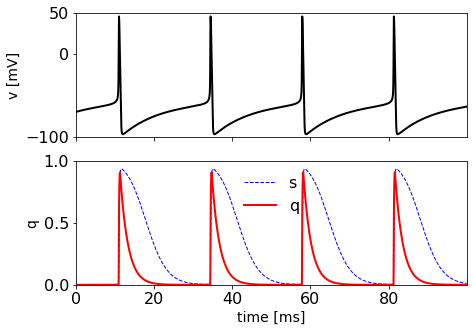

In [8]:
fig, ax = plt.subplots(2, figsize=(7, 5), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s, lw=1, c="b", ls="--", label="s")
ax[1].plot(t, q, lw=2, c="r", label="q")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("q", fontsize=14)
ax[0].set_yticks([-100, 0, 50])
ax[0].set_ylim(-100, 50)
ax[1].set_yticks([0, 0.5, 1])
ax[1].legend(frameon=False);
    

In [9]:
# - [RTM_PLOT_S_TWO_VARIABLES]
from mndynamics.models.py.RTM_Base import RTM_2s
obj = RTM_2s()
obj()

Reduced Traub-Miles Model of a Pyramidal Neuron 
in Rat Hippocampus with 2 synaptic gating variables (Eq 20.8-10).


{'c': 1.0,
 'g_k': 80.0,
 'g_na': 100.0,
 'g_l': 0.1,
 'v_k': -100.0,
 'v_na': 50.0,
 'v_l': -67.0,
 'v_thr': -20.0,
 'i_ext': 1.5,
 't_end': 2000.0,
 'v0': -70.0,
 'dt': 0.01,
 'tau_r': 300.0,
 'tau_d': 10.0,
 'tau_d_q': 10.0}

In [10]:
obj = RTM_2s({'tau_r': 10,
              'tau_d': 300.0, 
              'tau_d_q': 10.0,
              'i_ext':0.12,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s1 = data['s']

obj = RTM_2s({'tau_r': 100,
              'tau_d': 300.0, 
              'tau_d_q': 100.0,
              'i_ext':0.12,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s2 = data['s']

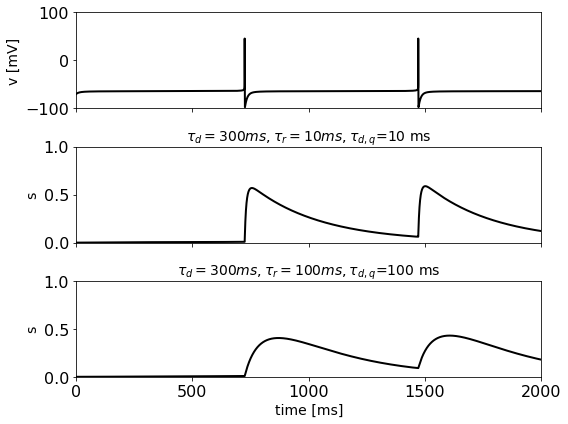

In [12]:
fig, ax = plt.subplots(3, figsize=(8, 6), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s1, lw=2, c="k")
ax[2].plot(t, s2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])

ax[1].set_title(r"$\tau_d=300 ms, \tau_r=10 ms, \tau_{d,q}$=10 ms", fontsize=14)
ax[2].set_title(r"$\tau_d=300 ms, \tau_r=100 ms, \tau_{d,q}$=100 ms", fontsize=14)
ax[-1].set_xticks(np.arange(0,2001, 500))

plt.tight_layout()


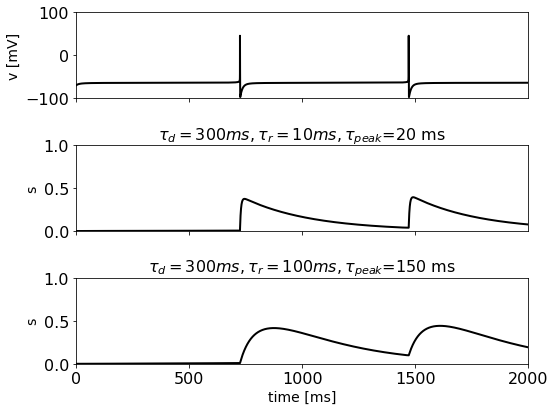

In [11]:
# [RTM_PLOT_S_PRESCRIBE_TAU_PEAK]
from mndynamics.utility import tau_d_q_function

tau_r = 10.0
tau_d = 300.0
tau_peak = 20.0
tau_d_q = tau_d_q_function(tau_d, tau_r, tau_peak)
obj = RTM_2s({'tau_r': tau_r,
              'tau_d': tau_d,
              'tau_d_q': tau_d_q ,
              'i_ext':0.12,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s1 = data['s']


tau_r = 100.0
tau_d = 300.0
tau_peak = 150.0
tau_d_q = tau_d_q_function(tau_d, tau_r, tau_peak)
obj = RTM_2s({'tau_r': tau_r,
              'tau_d': tau_d,
              'tau_d_q': tau_d_q ,
              'i_ext':0.12,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s2 = data['s']


fig, ax = plt.subplots(3, figsize=(8, 6), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s1, lw=2, c="k")
ax[2].plot(t, s2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])

ax[1].set_title(r"$\tau_d=300 ms, \tau_r=10 ms, \tau_{peak}$=20 ms")
ax[2].set_title(r"$\tau_d=300 ms, \tau_r=100 ms, \tau_{peak}$=150 ms")

ax[-1].set_xticks(np.arange(0,2001, 500))

plt.tight_layout()


Period is     75.640 ms


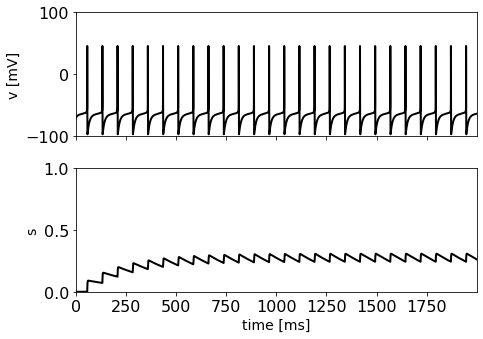

In [13]:
# [S_BUILDUP]

from mndynamics.models.py.RTM_Base import RTM_2s

tau_r = 10.0
tau_d = 300.0
tau_peak = 5.0
tau_d_q = tau_d_q_function(tau_d, tau_r, tau_peak)
obj = RTM_2s({'tau_r': tau_r,
              'tau_d': tau_d,
              'tau_d_q': tau_d_q ,
              'i_ext':0.2,
              't_end': 2000,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s = data['s']

nSteps = len(v)
spikeThreshold = -20.0
dt = obj.dt

#spike detection
nSpikes = 0
tSpikes = []
for i in range(1, nSteps):
    if (v[i - 1] <= spikeThreshold) & (v[i] > spikeThreshold):
        nSpikes += 1
        ts = ((i - 1) * dt * (v[i - 1] - spikeThreshold) +
                    i * dt * (spikeThreshold - v[i])) / (v[i - 1] - v[i])
        tSpikes.append(ts)

period = tSpikes[-1] - tSpikes[-2]
print ("Period is %10.3f ms" % period)


fig, ax = plt.subplots(2, figsize=(7, 5), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
plt.tight_layout()

Period is     75.660 ms


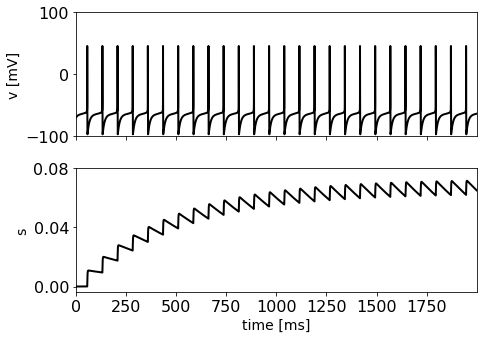

In [17]:
# [S_SLOW_BUILDUP]

from mndynamics.models.py.RTM_Base import RTM_2s

tau_r = 100.0
tau_d = 500.0
tau_d_q = 1.0
obj = RTM_2s({'tau_r': tau_r,
              'tau_d': tau_d,
              'tau_d_q': tau_d_q ,
              'i_ext':0.2,
              't_end': 2000,
              })
data = obj.simulate()
t = data['t']
v = data['v']
s = data['s']

nSteps = len(v)
spikeThreshold = -20.0
dt = obj.dt

#spike detection
nSpikes = 0
tSpikes = []
for i in range(1, nSteps):
    if (v[i - 1] <= spikeThreshold) & (v[i] > spikeThreshold):
        nSpikes += 1
        ts = ((i - 1) * dt * (v[i - 1] - spikeThreshold) +
                    i * dt * (spikeThreshold - v[i])) / (v[i - 1] - v[i])
        tSpikes.append(ts)

period = tSpikes[-1] - tSpikes[-2]
print ("Period is %10.3f ms" % period)


fig, ax = plt.subplots(2, figsize=(7, 5), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, s, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.04, 0.08])
plt.tight_layout()